# Financial News Dataset - Descriptive Statistics Analysis

This notebook performs comprehensive descriptive statistics analysis on the Financial News and Stock Price Integration Dataset (FNSPID).

## Dataset Overview
The dataset contains the following columns:
- **headline**: Article release headline/title
- **url**: Direct link to the full news article
- **publisher**: Author/creator of article
- **date**: Publication date and time (UTC-4 timezone)
- **stock**: Stock ticker symbol

## 1. Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

## 2. Load and Explore the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('../data/raw_analyst_ratings.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nFirst few rows:")
df.head()

Dataset Shape: (1407328, 6)

Column Names:
['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock']

First few rows:


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [3]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print("\nData Types:")
print(df.dtypes)

Missing Values:
Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

Data Types:
Unnamed: 0     int64
headline      object
url           object
publisher     object
date          object
stock         object
dtype: object


## 3. Headline Length Statistics

In [4]:
# Calculate headline lengths
df['headline_char_count'] = df['headline'].str.len()
df['headline_word_count'] = df['headline'].str.split().str.len()

# Calculate descriptive statistics for headline lengths
headline_stats = {
    'Character Count': {
        'Mean': df['headline_char_count'].mean(),
        'Median': df['headline_char_count'].median(),
        'Min': df['headline_char_count'].min(),
        'Max': df['headline_char_count'].max(),
        'Std Dev': df['headline_char_count'].std()
    },
    'Word Count': {
        'Mean': df['headline_word_count'].mean(),
        'Median': df['headline_word_count'].median(),
        'Min': df['headline_word_count'].min(),
        'Max': df['headline_word_count'].max(),
        'Std Dev': df['headline_word_count'].std()
    }
}

# Display headline statistics
headline_stats_df = pd.DataFrame(headline_stats).round(2)
print("Headline Length Statistics:")
print(headline_stats_df)

Headline Length Statistics:
         Character Count  Word Count
Mean               73.12       11.42
Median             64.00       10.00
Min                 3.00        1.00
Max               512.00       77.00
Std Dev            40.74        6.35


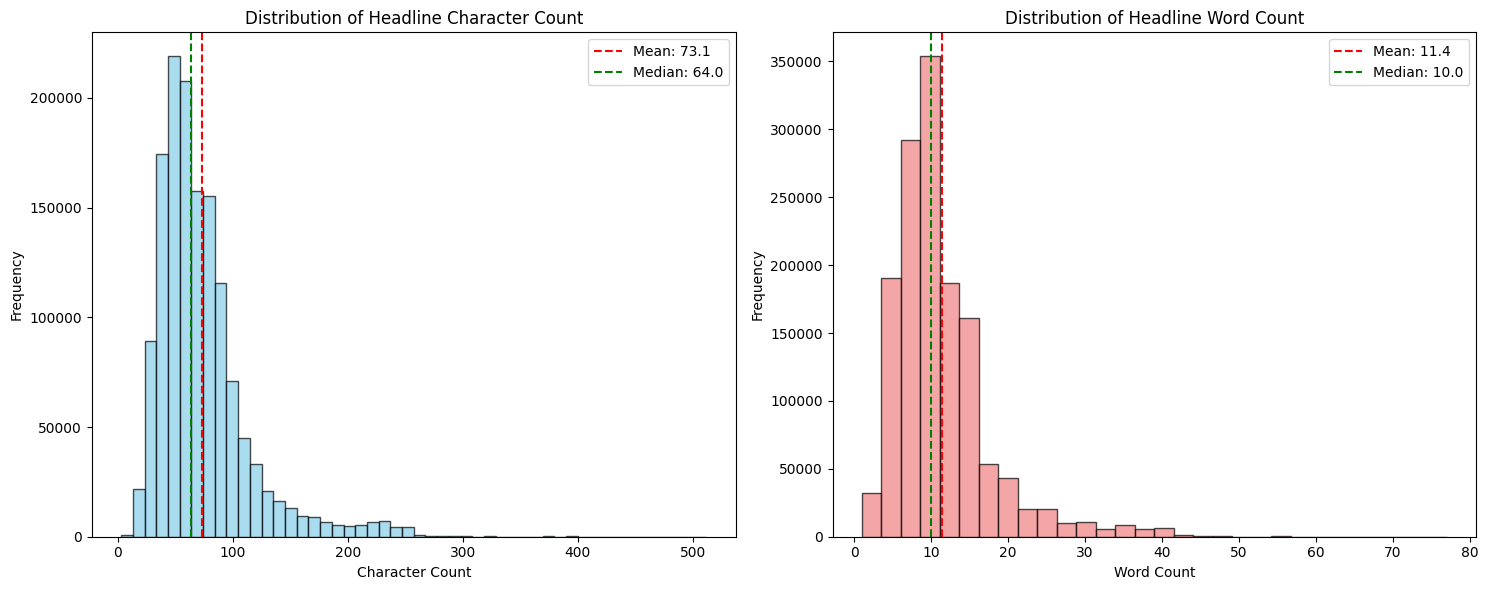

In [5]:
# Visualize headline length distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Character count distribution
ax1.hist(df['headline_char_count'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_title('Distribution of Headline Character Count')
ax1.set_xlabel('Character Count')
ax1.set_ylabel('Frequency')
ax1.axvline(df['headline_char_count'].mean(), color='red', linestyle='--', label=f'Mean: {df["headline_char_count"].mean():.1f}')
ax1.axvline(df['headline_char_count'].median(), color='green', linestyle='--', label=f'Median: {df["headline_char_count"].median():.1f}')
ax1.legend()

# Word count distribution
ax2.hist(df['headline_word_count'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
ax2.set_title('Distribution of Headline Word Count')
ax2.set_xlabel('Word Count')
ax2.set_ylabel('Frequency')
ax2.axvline(df['headline_word_count'].mean(), color='red', linestyle='--', label=f'Mean: {df["headline_word_count"].mean():.1f}')
ax2.axvline(df['headline_word_count'].median(), color='green', linestyle='--', label=f'Median: {df["headline_word_count"].median():.1f}')
ax2.legend()

plt.tight_layout()
plt.show()

## 4. Publisher Analysis

In [6]:
# Count articles per publisher
publisher_counts = df['publisher'].value_counts()

print(f"Total number of unique publishers: {len(publisher_counts)}")
print(f"Publisher with most articles: {publisher_counts.index[0]} ({publisher_counts.iloc[0]} articles)")
print(f"Publisher with least articles: {publisher_counts.index[-1]} ({publisher_counts.iloc[-1]} articles)")
print("\nTop 10 Publishers by Article Count:")
print(publisher_counts.head(10))

Total number of unique publishers: 1034
Publisher with most articles: Paul Quintaro (228373 articles)
Publisher with least articles: Jeremie Capron (1 articles)

Top 10 Publishers by Article Count:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


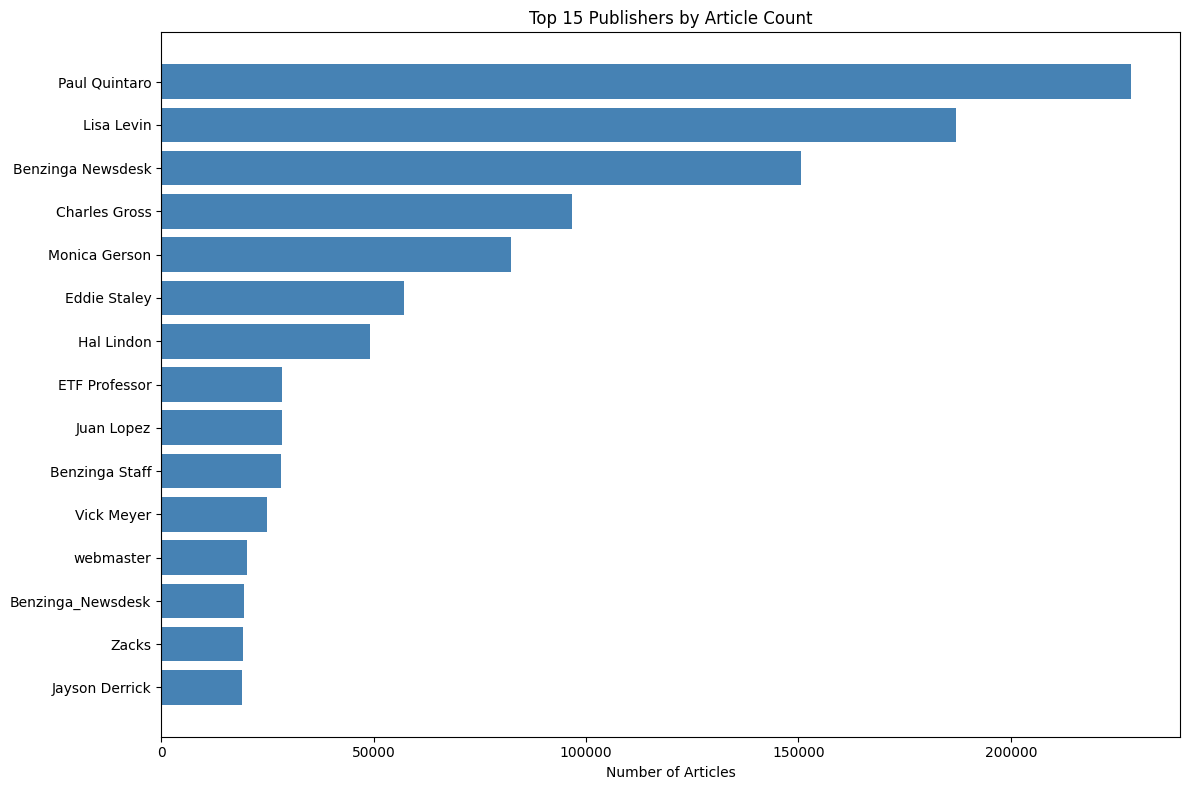

In [7]:
# Visualize top publishers
plt.figure(figsize=(12, 8))
top_publishers = publisher_counts.head(15)
plt.barh(range(len(top_publishers)), top_publishers.values, color='steelblue')
plt.yticks(range(len(top_publishers)), top_publishers.index)
plt.xlabel('Number of Articles')
plt.title('Top 15 Publishers by Article Count')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 5. Stock Ticker Analysis (Optional)

In [8]:
# Count articles per stock ticker
stock_counts = df['stock'].value_counts()

print(f"Total number of unique stock tickers: {len(stock_counts)}")
print(f"Stock with most articles: {stock_counts.index[0]} ({stock_counts.iloc[0]} articles)")
print(f"Stock with least articles: {stock_counts.index[-1]} ({stock_counts.iloc[-1]} articles)")
print("\nTop 10 Stocks by Article Count:")
print(stock_counts.head(10))

Total number of unique stock tickers: 6204
Stock with most articles: MRK (3333 articles)
Stock with least articles: DXJR (1 articles)

Top 10 Stocks by Article Count:
stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
NFLX    3028
M       3025
EBAY    3018
GILD    2968
VZ      2966
Name: count, dtype: int64


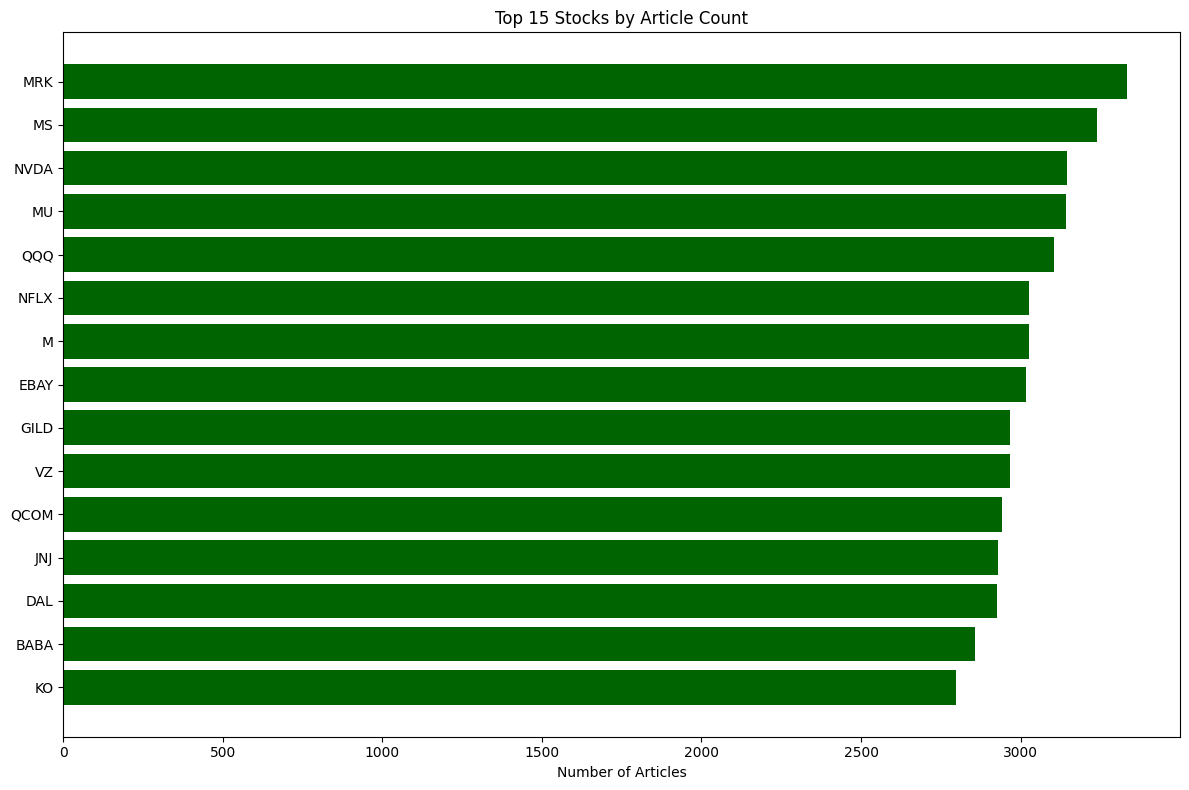

In [9]:
# Visualize top stocks
plt.figure(figsize=(12, 8))
top_stocks = stock_counts.head(15)
plt.barh(range(len(top_stocks)), top_stocks.values, color='darkgreen')
plt.yticks(range(len(top_stocks)), top_stocks.index)
plt.xlabel('Number of Articles')
plt.title('Top 15 Stocks by Article Count')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 6. Date and Time Analysis

In [10]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'].str[:10])

# Extract date components
df['date_only'] = df['date'].dt.date
df['day_of_week'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()
df['year'] = df['date'].dt.year

# Basic date statistics
print("Date Range:")
print(f"Earliest article: {df['date'].min()}")
print(f"Latest article: {df['date'].max()}")
print(f"Total days covered: {(df['date'].max() - df['date'].min()).days + 1}")

Date Range:
Earliest article: 2009-02-14 00:00:00
Latest article: 2020-06-11 00:00:00
Total days covered: 4136


Average articles per day: 355.84
Most active day: 2020-03-12 (2739 articles)
Least active day: 2009-02-14 (1 articles)


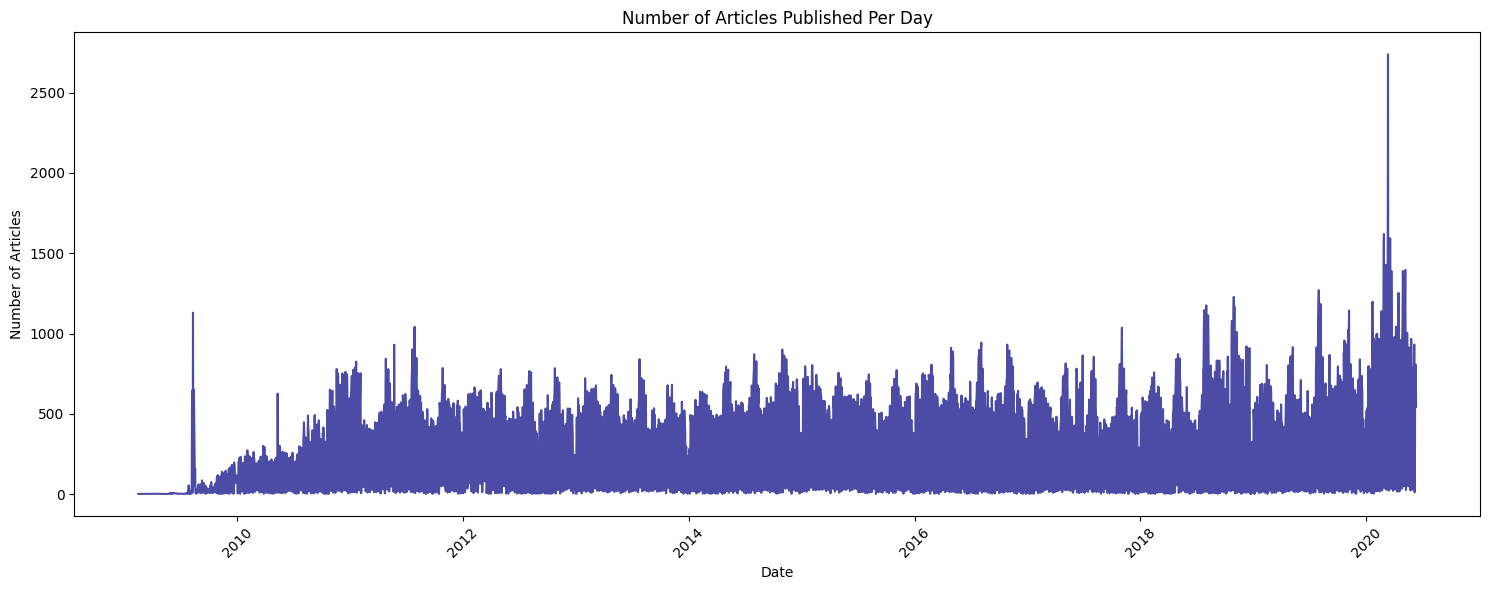

In [11]:
# Articles per day analysis
daily_counts = df['date_only'].value_counts().sort_index()

print(f"Average articles per day: {daily_counts.mean():.2f}")
print(f"Most active day: {daily_counts.idxmax()} ({daily_counts.max()} articles)")
print(f"Least active day: {daily_counts.idxmin()} ({daily_counts.min()} articles)")

# Plot articles per day
plt.figure(figsize=(15, 6))
daily_counts.plot(kind='line', color='navy', alpha=0.7)
plt.title('Number of Articles Published Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Articles by Day of Week:
day_of_week
Monday       265164
Tuesday      296470
Wednesday    300940
Thursday     302595
Friday       217892
Saturday       7753
Sunday        16514
Name: count, dtype: int64


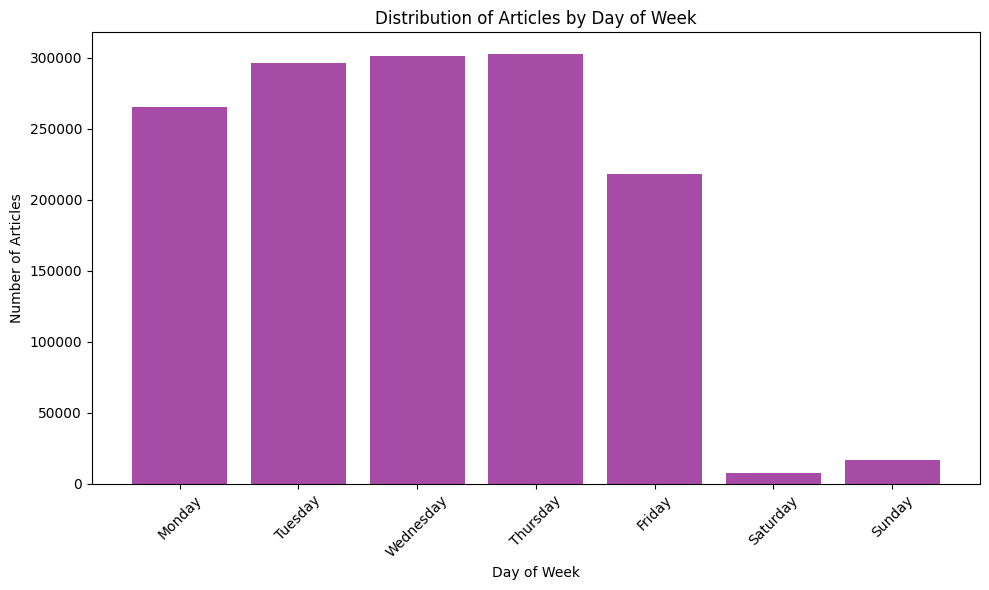

In [12]:
# Day of week analysis
dow_counts = df['day_of_week'].value_counts()
# Reorder to start with Monday
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_counts = dow_counts.reindex(dow_order)

print("Articles by Day of Week:")
print(dow_counts)

# Plot day of week distribution
plt.figure(figsize=(10, 6))
plt.bar(dow_counts.index, dow_counts.values, color='purple', alpha=0.7)
plt.title('Distribution of Articles by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Articles by Month:
month
January      121541
February     122835
March        121948
April        121815
May          130339
June         106600
July         110762
August       124042
September     96087
October      124800
November     121431
December     105128
Name: count, dtype: int64


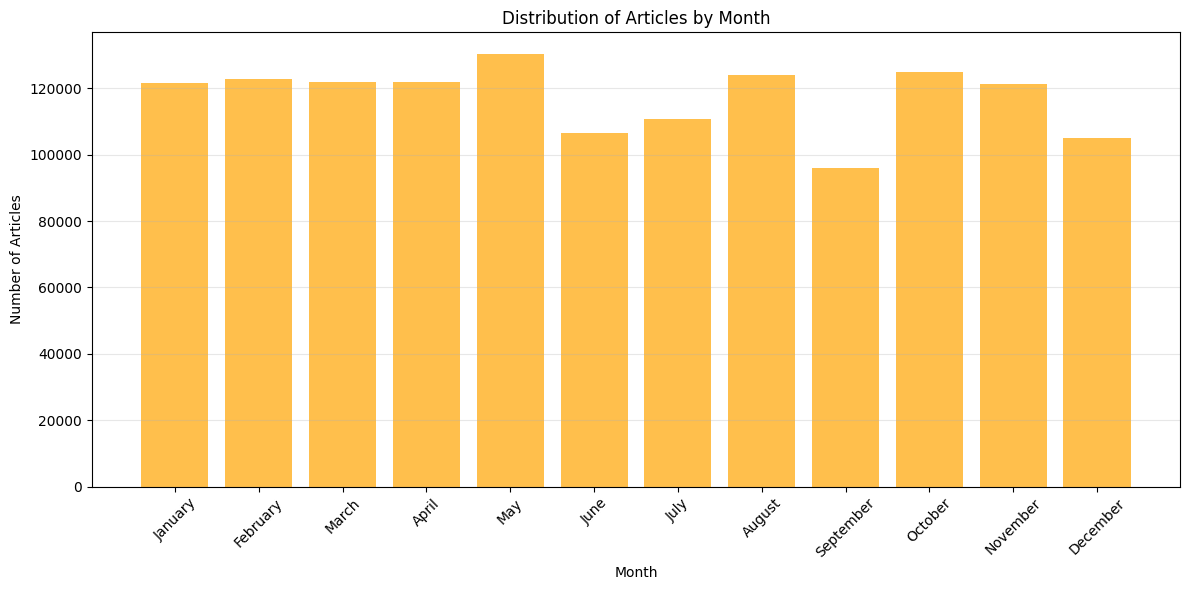

In [13]:
# Monthly distribution analysis
monthly_counts = df['month'].value_counts()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_counts = monthly_counts.reindex(month_order).dropna()

print("Articles by Month:")
print(monthly_counts)

# Plot monthly distribution
plt.figure(figsize=(12, 6))
plt.bar(monthly_counts.index, monthly_counts.values, color='orange', alpha=0.7)
plt.title('Distribution of Articles by Month')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 7. Summary Report

In [14]:
# Generate comprehensive summary report
print("="*60)
print("FINANCIAL NEWS DATASET - DESCRIPTIVE STATISTICS SUMMARY")
print("="*60)

print(f"\n📊 DATASET OVERVIEW:")
print(f"   • Total articles: {len(df):,}")
print(f"   • Date range: {df['date'].min().strftime('%Y-%m-%d')} to {df['date'].max().strftime('%Y-%m-%d')}")
print(f"   • Unique publishers: {df['publisher'].nunique():,}")
print(f"   • Unique stock tickers: {df['stock'].nunique():,}")

print(f"\n📝 HEADLINE STATISTICS:")
print(f"   • Average character count: {df['headline_char_count'].mean():.1f}")
print(f"   • Average word count: {df['headline_word_count'].mean():.1f}")
print(f"   • Longest headline: {df['headline_char_count'].max()} characters")
print(f"   • Shortest headline: {df['headline_char_count'].min()} characters")

print(f"\n📰 PUBLISHER INSIGHTS:")
print(f"   • Most active publisher: {publisher_counts.index[0]} ({publisher_counts.iloc[0]:,} articles)")
print(f"   • Average articles per publisher: {publisher_counts.mean():.1f}")

print(f"\n📈 STOCK COVERAGE:")
print(f"   • Most covered stock: {stock_counts.index[0]} ({stock_counts.iloc[0]:,} articles)")
print(f"   • Average articles per stock: {stock_counts.mean():.1f}")

print(f"\n🕐 TEMPORAL PATTERNS:")
print(f"   • Average articles per day: {daily_counts.mean():.1f}")
print(f"   • Most active day: {daily_counts.idxmax()} ({daily_counts.max()} articles)")
print(f"   • Most active month: {monthly_counts.idxmax()} ({monthly_counts.max():,} articles)")
print(f"   • Most active weekday: {dow_counts.idxmax()} ({dow_counts.max():,} articles)")

print("="*60)

FINANCIAL NEWS DATASET - DESCRIPTIVE STATISTICS SUMMARY

📊 DATASET OVERVIEW:
   • Total articles: 1,407,328
   • Date range: 2009-02-14 to 2020-06-11
   • Unique publishers: 1,034
   • Unique stock tickers: 6,204

📝 HEADLINE STATISTICS:
   • Average character count: 73.1
   • Average word count: 11.4
   • Longest headline: 512 characters
   • Shortest headline: 3 characters

📰 PUBLISHER INSIGHTS:
   • Most active publisher: Paul Quintaro (228,373 articles)
   • Average articles per publisher: 1361.1

📈 STOCK COVERAGE:
   • Most covered stock: MRK (3,333 articles)
   • Average articles per stock: 226.8

🕐 TEMPORAL PATTERNS:
   • Average articles per day: 355.8
   • Most active day: 2020-03-12 (2739 articles)
   • Most active month: May (130,339 articles)
   • Most active weekday: Thursday (302,595 articles)
